In [5]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# lecture, import, scraping, agrégation des données

In [6]:
# Import data
Admission = pd.read_csv('Admission.csv', index_col = "Serial No.")

In [11]:
Admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
Admission.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
Serial No.,,,,,,,,
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91
399,312,103,3,3.5,4.0,8.78,0,0.67
400,333,117,4,5.0,4.0,9.66,1,0.95


In [8]:
Admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


# visualisation statistiques descriptives

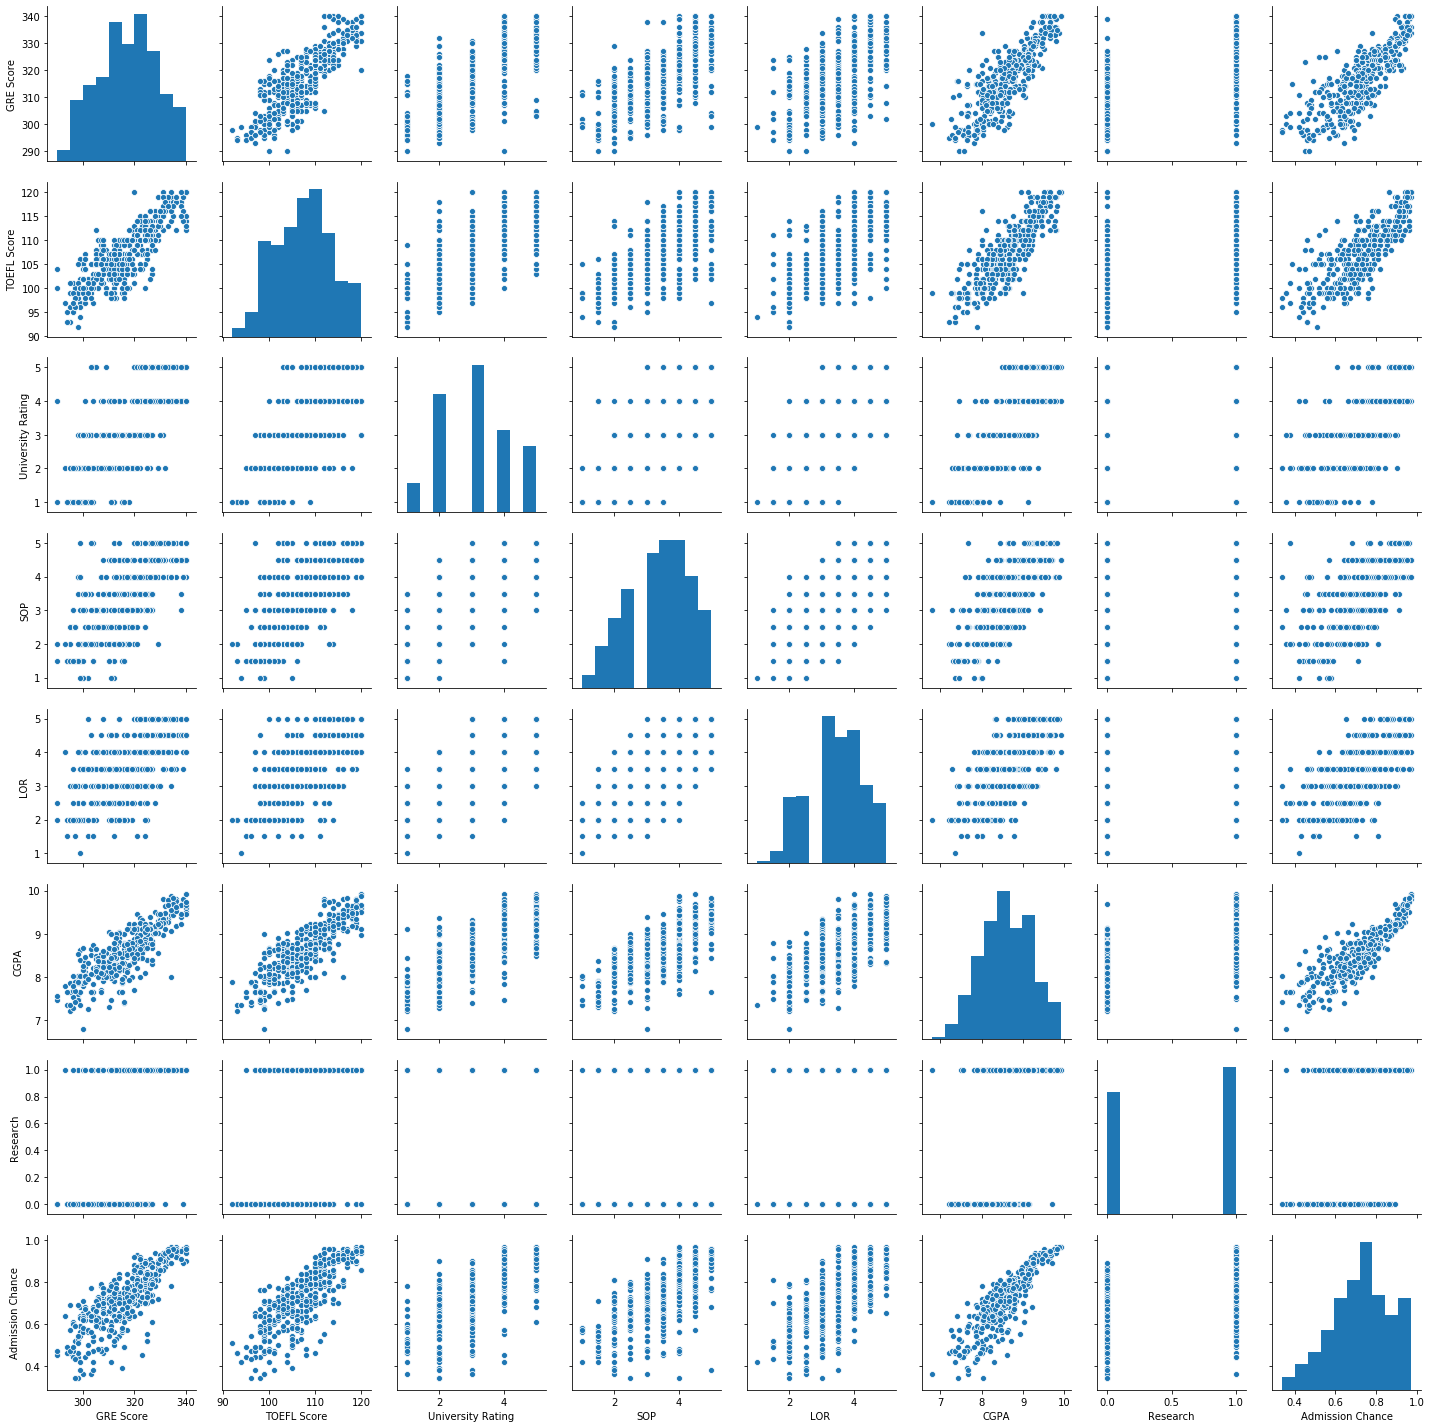

In [9]:
sns.pairplot(Admission)

In [18]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(Admission,figsize=(9,9))

ModuleNotFoundError: No module named 'scatter_matrix'

In [10]:
from sklearn.cluster import KMeans

# Elbow method
distortions = []

for k in range(1, 11):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(Admission)
    distortions.append(kmeanModel.inertia_)

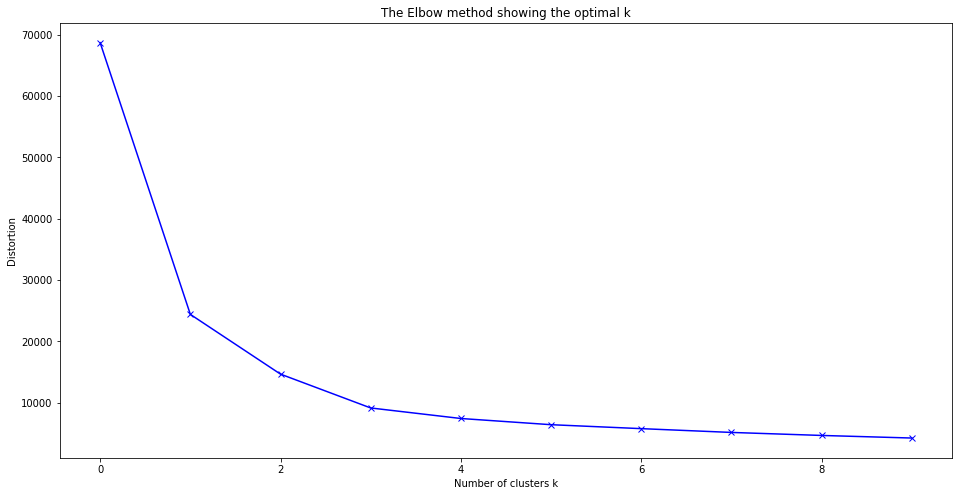

In [11]:
# Plot elbow method
plt.figure(figsize = (16, 8))
plt.plot(distortions, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

# Silhouette method
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(Admission)
    score = silhouette_score(A, kmeanModel.labels_)
    silhouette_coefficients.append(score)

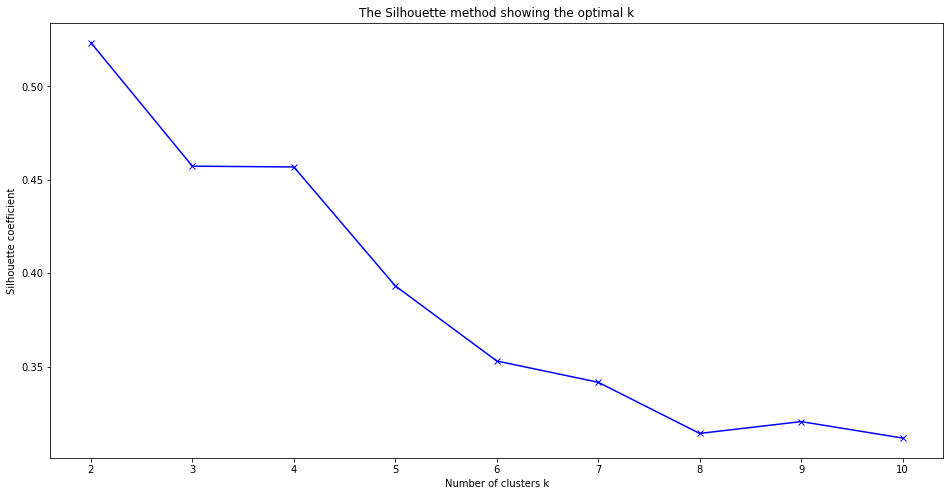

In [14]:
# Plot silhouette method
plt.figure(figsize = (16, 8))
plt.plot(range(2, 11), silhouette_coefficients, 'bx-')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette coefficient')
plt.title('The Silhouette method showing the optimal k')
plt.show()

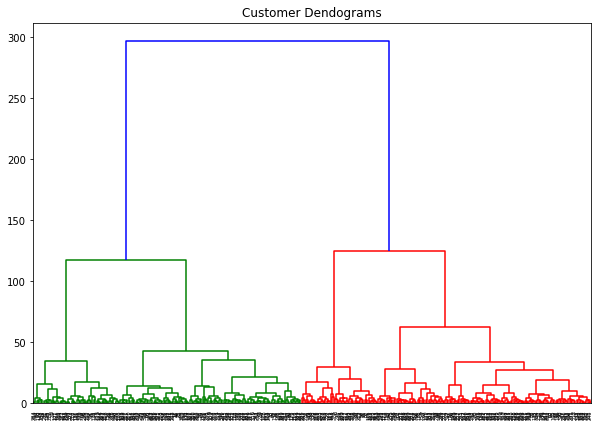

In [21]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Admissions Dendograms")
dend = shc.dendrogram(shc.linkage(Admission, method='ward'))

In [38]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(Admission)

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,

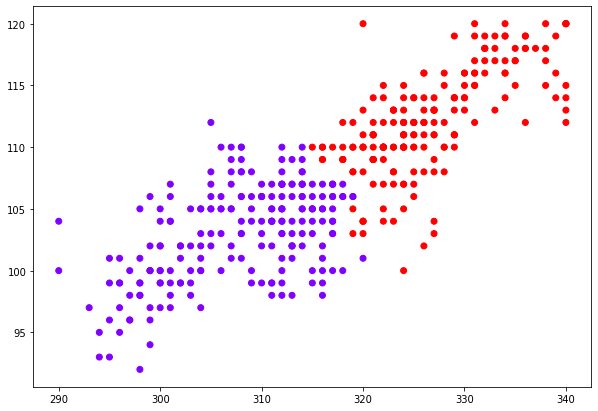

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(Admission.iloc[:,0], Admission.iloc[:,1], c=cluster.labels_, cmap='rainbow')